In [1]:
import networkx as nx
import scipy
import numpy as np
import statistics
import matplotlib.pyplot as plt
from random import seed
from random import randint

# Testes

In [14]:
G = nx.random_geometric_graph(20, 0.5, seed=123)

In [15]:
for node in G.nodes(data=True):
    print(node)

(0, {'pos': [0.052363598850944326, 0.08718667752263232]})
(1, {'pos': [0.4072417636703983, 0.10770023493843905]})
(2, {'pos': [0.9011988779516946, 0.0381536661023224]})
(3, {'pos': [0.5362020400339269, 0.33219769850967984]})
(4, {'pos': [0.8520866189293687, 0.1596623967219699]})
(5, {'pos': [0.3372166571092755, 0.3337963946289553]})
(6, {'pos': [0.24516335251761112, 0.0016705535792228554]})
(7, {'pos': [0.4362757934152184, 0.08761349975042287]})
(8, {'pos': [0.5975994644879905, 0.06987696145918243]})
(9, {'pos': [0.3154589737358633, 0.44832170830694373]})
(10, {'pos': [0.9053986522844989, 0.09276456137849509]})
(11, {'pos': [0.14217506443150107, 0.7900718443588016]})
(12, {'pos': [0.021235974816989245, 0.9111505480903207]})
(13, {'pos': [0.5734080856809272, 0.2653217052615633]})
(14, {'pos': [0.8378376441951344, 0.7687947474799836]})
(15, {'pos': [0.3434621581559646, 0.801496591292033]})
(16, {'pos': [0.2068624706661114, 0.6089025261905533]})
(17, {'pos': [0.5270749521614166, 0.8093385

In [17]:
G.nodes(data=True)[0]['pos']

[0.052363598850944326, 0.08718667752263232]

In [28]:
G.edges[0,5]

{}

In [5]:
0 in G

True

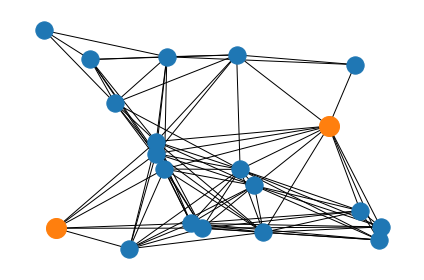

In [4]:
allNodesPos = {}
allNodesIdx = []

for node in G.nodes(data=True):
    nodeId = node[0]
    nodePos = node[1]['pos']
    allNodesPos[nodeId]=nodePos
    allNodesIdx.append(nodeId)


furthestNodes = [0,19]
nonFurthestNodes = allNodesIdx.copy()

for node in furthestNodes:
    nonFurthestNodes.remove(node)

allNodesIdx = []

nx.draw_networkx_nodes(
    G, allNodesPos, node_size=300, nodelist=nonFurthestNodes, node_color="tab:blue"
)
nx.draw_networkx_nodes(G, allNodesPos, node_size=400, nodelist=furthestNodes, node_color="tab:orange")
nx.draw_networkx_edges(G, allNodesPos)
# Customize axes
ax = plt.gca()
ax.margins(0.11)
plt.tight_layout()
plt.axis("off")
plt.show()

### Teste 2

In [5]:
xPositions = np.random.uniform(0, 300, 100)
yPositions = np.random.uniform(0, 300, 100)

In [6]:
nodePos = {}
for nodeIdx, positions in enumerate(zip(xPositions, yPositions)):
    nodePos[nodeIdx] = positions

In [7]:
G = nx.random_geometric_graph(20, 0.5, pos=nodePos, seed=123)

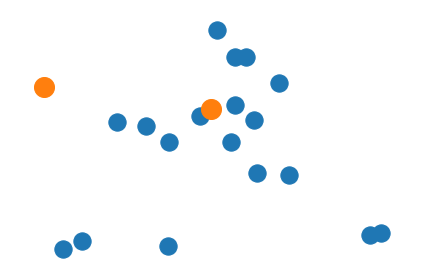

In [8]:
allNodesPos = {}
allNodesIdx = []

for node in G.nodes(data=True):
    nodeId = node[0]
    nodePos = node[1]['pos']
    allNodesPos[nodeId]=nodePos
    allNodesIdx.append(nodeId)


furthestNodes = [0,19]
nonFurthestNodes = allNodesIdx.copy()

for node in furthestNodes:
    nonFurthestNodes.remove(node)

allNodesIdx = []

nx.draw_networkx_nodes(
    G, allNodesPos, node_size=300, nodelist=nonFurthestNodes, node_color="tab:blue"
)
nx.draw_networkx_nodes(G, allNodesPos, node_size=400, nodelist=furthestNodes, node_color="tab:orange")
nx.draw_networkx_edges(G, allNodesPos)
# Customize axes
ax = plt.gca()
ax.margins(0.11)
plt.tight_layout()
plt.axis("off")
plt.show()

## Testes com grafos reais

In [9]:
from scipy.io import mmread

In [10]:
roadGraph = mmread('road-minnesota.mtx')

In [11]:
nxRoadGraph = nx.from_scipy_sparse_matrix(roadGraph)

In [12]:
print(list(nxRoadGraph.nodes)[:10])

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [13]:
print(list(nxRoadGraph.edges)[:10])

[(0, 6), (1, 16), (2, 3), (2, 11), (4, 9), (5, 8), (6, 7), (6, 14), (8, 9), (8, 12)]


In [14]:
print(list(nxRoadGraph.nodes(data=True))[:10])

[(0, {}), (1, {}), (2, {}), (3, {}), (4, {}), (5, {}), (6, {}), (7, {}), (8, {}), (9, {})]


# Código Principal

In [20]:
SPACEAREA = 10000
MAXEDGEWEIGHT = 200
MINEDGEWEIGHT = 1

def getPValues(gType='geometrical'):
    pValues = []
    probs =      [0.125, 0.125, 0.125, 0.1,  0.05,  0.04,  0.03,  0.02,  0.01]
    radius =     [20,  10,   7,   5,  3,  2,  1.5,  1,  0.8]

    if gType == 'geometrical':
        pValues = radius
        print("Usou radius!")
    elif gType == 'probabilistic':
        pValues = probs
        print("Usou probs!")

    return pValues

def generateGraph(areaWidth, gType='geometrical', gSize = 50, isDirected=False, gSeed = 123):
    G = 0
    if gType == 'geometrical':
        xPositions = np.random.uniform(0, areaWidth, gSize)
        yPositions = np.random.uniform(0, areaWidth, gSize)
        
        nodePos = {}
        for nodeIdx, positions in enumerate(zip(xPositions, yPositions)):
            nodePos[nodeIdx] = positions
        
        G = nx.random_geometric_graph(gSize, 5 - np.log10(areaWidth), pos = nodePos, seed=gSeed)
    elif gType == 'probabilistic':
        G = nx.erdos_renyi_graph(gSize, 0.15, seed=gSeed, directed=isDirected)
    
    return G

def getLargestSubGraph(G):
    largest_cc = max(nx.connected_components(G), key=len)
    largest_cc_graph = G.subgraph(largest_cc).copy()
    return largest_cc_graph

def drawAndSave(G, outName, topLeftNodeId, rightDownNodeId):
    plt.figure(figsize=(12, 10))
    print(f"Desenhando grafo {outName}")
    #nx.draw(G, node_size=50, cmap=plt.cm.Reds_r, )
    allNodesPos = {}
    allNodesIdx = []

    for node in G.nodes(data=True):
        nodeId = node[0]
        nodePos = node[1]['pos']
        allNodesPos[nodeId]=nodePos
        allNodesIdx.append(nodeId)


    furthestNodes = [topLeftNodeId, rightDownNodeId]
    nonFurthestNodes = allNodesIdx.copy()

    for node in furthestNodes:
        nonFurthestNodes.remove(node)

    allNodesIdx = []

    nx.draw_networkx_nodes(
        G, allNodesPos, node_size=100, nodelist=nonFurthestNodes, node_color="tab:blue"
    )
    nx.draw_networkx_nodes(G, allNodesPos, node_size=200, nodelist=furthestNodes, node_color="tab:orange")
    nx.draw_networkx_edges(G, allNodesPos)
    # Customize axes
    ax = plt.gca()
    ax.margins(0.11)
    plt.tight_layout()
    plt.axis("off")
    #plt.show()
    plt.savefig(f"graph{len(G.nodes)}.png")
    print("Terminou de desenhar")
    
def printGraphStats(G):
    gTotalSize = len(G.nodes)
    gNumEdges = len(G.edges)
    meanEdgePerNode = round(gNumEdges/gTotalSize,2)
    maxDegree = 0
    degrees = []
    for nodeDegreePair in list(G.degree):
        degrees.append(nodeDegreePair[1])
        if nodeDegreePair[1] > maxDegree:
            maxDegree = nodeDegreePair[1]
    
    meanDegree = round(statistics.mean(degrees),2)
    degreesStDev = round(statistics.stdev(degrees),2)
    quantis = [round(q, 1) for q in statistics.quantiles(degrees, n=4)]
    print(f"Graph num Nodes: {gTotalSize}, num edges:{gNumEdges}, Mean Edge Per Node: {meanEdgePerNode}")
    print(f"Graph density: {nx.density(G)}")
    print(f"Degree stats: {meanDegree}(+-{degreesStDev}), Max degree: {maxDegree}, Quantis: {quantis}")

def saveNodesInfo(G, outFileName):
    with open(outFileName, "w") as nodePosFile:
        for node in G.nodes(data=True):
            nodeCoords = node[1]['pos']
            nodeId = node[0]
            nodePosFile.write(f"{nodeId},{nodeCoords[0]},{nodeCoords[1]}\n")

def saveEdgesInfo(G, outFileName):
    edgesWeights = {}
    with open(outFileName, "w") as outFile:
        print("Iterando pelas arestas")
        for edge in G.edges:
            randomWeight = randint(MINEDGEWEIGHT, MAXEDGEWEIGHT)
            outFile.write(f"{edge[0]},{edge[1]},{randomWeight}\n")
            outFile.write(f"{edge[1]},{edge[0]},{randomWeight}\n")
            edgesWeights[edge] = {"weight":randomWeight}
            
    print(f"Terminou de salvar dados de {outFileName}")
    return edgesWeights

def getNodesProbablyFurthest(G, areaWidth):
    leftTopDiagNodeId = -1
    rightDownDiagNodeId = -1
    leftTopDiagCoords = [areaWidth, areaWidth]
    rightDownDiagCoords = [0, 0]
    for node in G.nodes(data=True):
        nodeCoords = node[1]['pos']
        nodeId = node[0]
        #if it is further right and bottom
        if(nodeCoords[0] > rightDownDiagCoords[0] and nodeCoords[1] > rightDownDiagCoords[1]):
            rightDownDiagNodeId = nodeId
            rightDownDiagCoords = nodeCoords
        
        if(nodeCoords[0] < leftTopDiagCoords[0] and nodeCoords[1] < leftTopDiagCoords[1]):
            leftTopDiagNodeId = nodeId
            leftTopDiagCoords = nodeCoords
    
    return (leftTopDiagNodeId,leftTopDiagCoords), (rightDownDiagNodeId, rightDownDiagCoords)

def saveFurthestNodes(G, topLeftNode, rightDownNode):
    outFileName = "nodesToGetPathGraph"+str(len(G.nodes))+".txt"
    print(f"Furthest nodes: leftTop: ({topLeftNode[0]},{topLeftNode[1]}), rightDown:({rightDownNode[0]},{rightDownNode[1]})")
    with open(outFileName, "w") as nodesToGetPathFile:
        nodesToGetPathFile.write(f"{topLeftNode[0]},{rightDownNode[0]}")

def euclidianHeuristic(pos1, pos2):
    return ((pos1[0] - pos2[0])**2 + (pos1[1] - pos2[0])**2)**(1/2)

def manhattanHeuristic(pos1, pos2):
    return abs(pos1[0] - pos2[0]) + abs(pos1[1] - pos2[1])

def saveShortestPathBetween(source, final, G, edgesWeights, gTotalSize):
    outFileName = f"shortestPath{gTotalSize}.txt"
    with open(outFileName, "w") as shortestPathFile:
        #sPath = nx.shortest_path(G, source=source, target=final, weight="weight")
        #sPath = nx.astar_path(G, source=source, target=final, weight="weight", heuristic = manhattanHeuristic)
        manhattan = lambda n1,n2: manhattanHeuristic(G.nodes(data=True)[n1]['pos'], G.nodes(data=True)[n2]['pos'])
        euclidian = lambda n1,n2: euclidianHeuristic(G.nodes(data=True)[n1]['pos'], G.nodes(data=True)[n2]['pos'])
        sPath = nx.astar_path(G, source=source, target=final, weight="weight", heuristic = manhattan)
        #length = nx.shortest_path_length(G, source=source, target=final, weight="weight")
        shortestPathFile.write(f"{str(sPath)}\n")
        shortestPathFile.write(f"Num nodes on Path: {len(sPath)}\n")
        sourceNode = sPath[0]
        weights = []
        weightsSum = 0
        for destNode in range(1, len(sPath)):
            destNodeId = sPath[destNode]
            edgeInfo = G.edges[sourceNode, destNodeId]
            edgeWeigth = edgeInfo['weight']
            weights.append(edgeWeigth)
            weightsSum += edgeWeigth
            sourceNode = destNodeId
        
        shortestPathFile.write(f"Weights:\n{str(weights)}\n")
        shortestPathFile.write(f"Path Cost: {weightsSum}\n")
        
        
def createAndSaveGraphs(graphType, graphSizes):     
    #pValues = getPValues(graphType)
    seed(100)
    for idx, graphSize in enumerate(graphSizes):
        AREAWIDTHS = np.amax([np.sqrt(graphSize),10])
        print(f"----GERANDO NOVO GRAFO!----")
        G = generateGraph(areaWidth=AREAWIDTHS, gType =  graphType, gSize = graphSize)
        G = getLargestSubGraph(G)

        gTotalSize = len(G.nodes)
        printGraphStats(G)
        topLeftNode = ()
        rightDownNode = ()
        if graphType == 'geometrical':
            #printar localização dos nós
            outFileName = "nodePosGraph"+str(gTotalSize)+".txt"
            saveNodesInfo(G, outFileName)
            #get furthest nodes
            topLeftNode, rightDownNode = getNodesProbablyFurthest(G, areaWidth=AREAWIDTHS)
            saveFurthestNodes(G, topLeftNode, rightDownNode)

        outFileName = "teste"+str(gTotalSize)+".txt"
        if(gTotalSize <= 2000):
            drawAndSave(G, outFileName, topLeftNode[0], rightDownNode[0])

        edgesWeights = saveEdgesInfo(G, outFileName)
        #Saves the random edges weights
        nx.set_edge_attributes(G, edgesWeights)
        saveShortestPathBetween(topLeftNode[0], rightDownNode[0], G, edgesWeights, gTotalSize)
        

----GERANDO NOVO GRAFO!----
Graph num Nodes: 100, num edges:1745, Mean Edge Per Node: 17.45
Graph density: 0.3525252525252525
Degree stats: 34.9(+-9.88), Max degree: 55, Quantis: [29.0, 34.0, 41.8]
Furthest nodes: leftTop: (42,(0.5330663988287265, 0.7546460683898704)), rightDown:(58,(8.436886518811054, 8.499034928089737))
Desenhando grafo teste100.txt
Terminou de desenhar
Iterando pelas arestas
Terminou de salvar dados de teste100.txt
----GERANDO NOVO GRAFO!----
Graph num Nodes: 1000, num edges:16799, Mean Edge Per Node: 16.8
Graph density: 0.03363163163163163
Degree stats: 33.6(+-7.4), Max degree: 55, Quantis: [28.0, 34.0, 39.0]
Furthest nodes: leftTop: (147,(0.325130716041513, 0.7722960337895551)), rightDown:(567,(30.907017257167187, 30.30685742657255))
Desenhando grafo teste1000.txt
Terminou de desenhar
Iterando pelas arestas
Terminou de salvar dados de teste1000.txt
----GERANDO NOVO GRAFO!----
Graph num Nodes: 2000, num edges:33134, Mean Edge Per Node: 16.57
Graph density: 0.016575

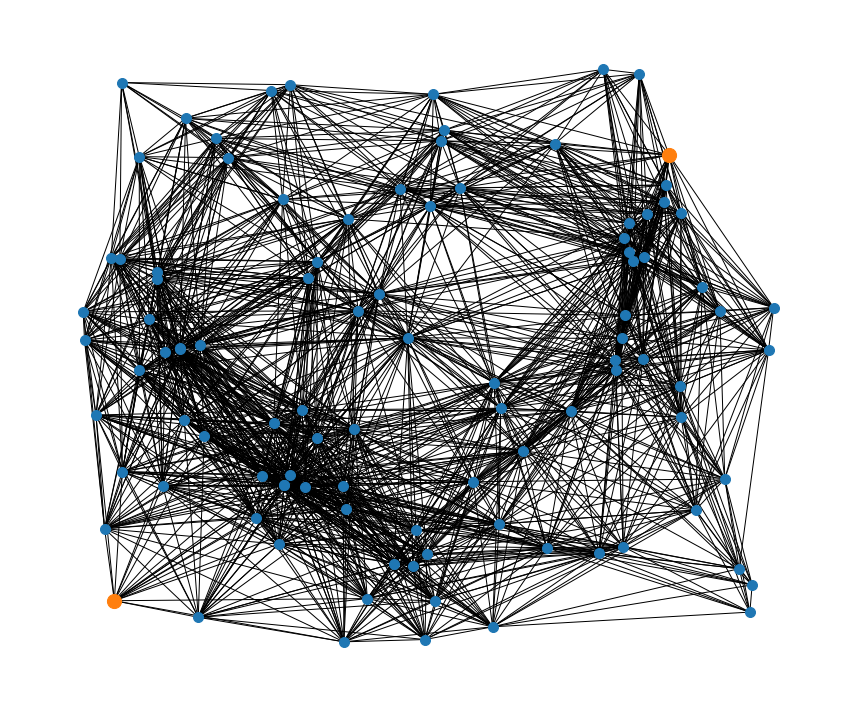

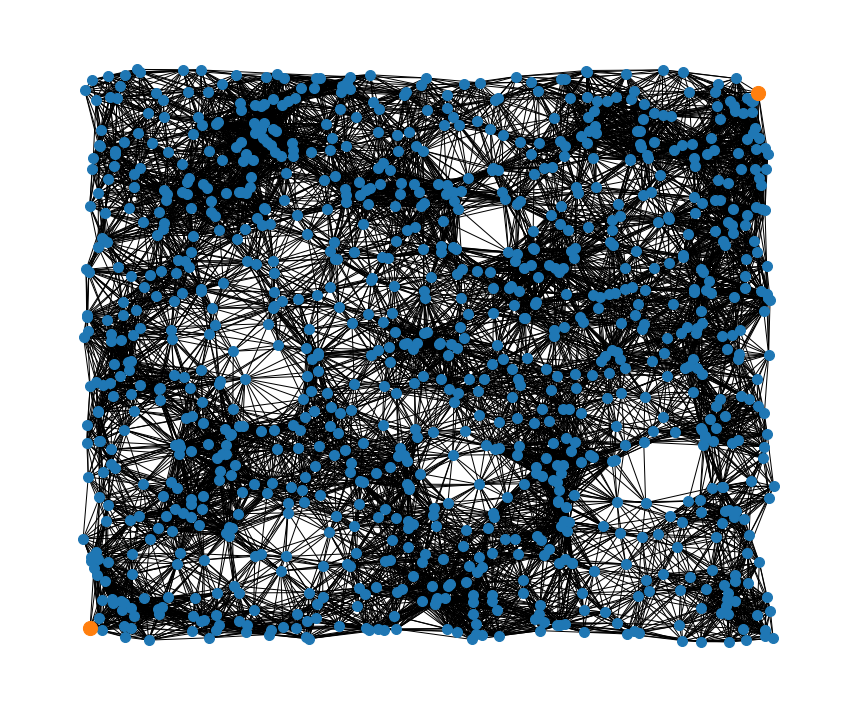

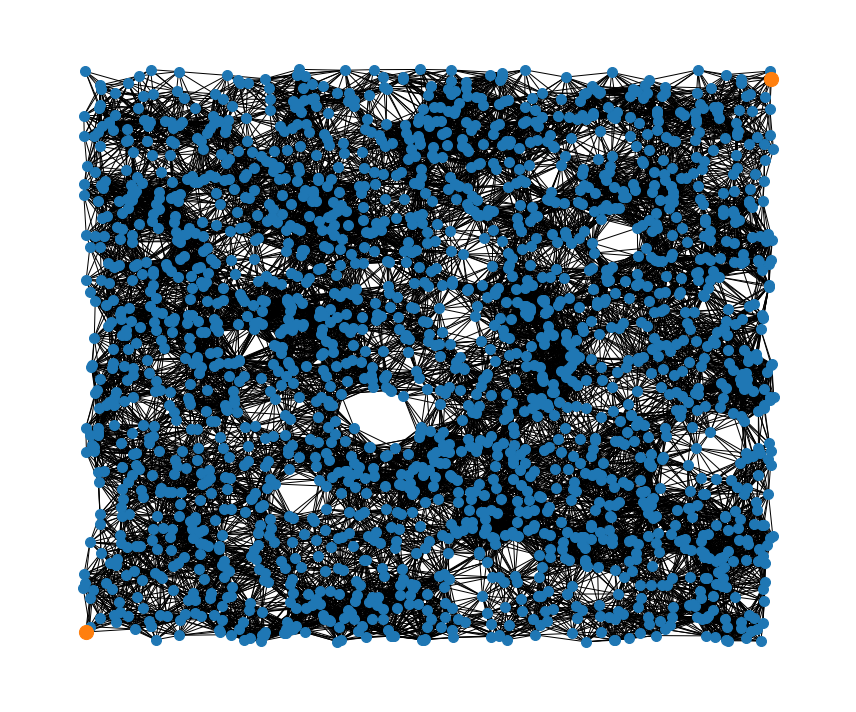

In [21]:
graphType = 'geometrical'
graphSizes = [100,   1000,  2000,  5000, 10000, 30000, 50000, 80000, 100000, 150000, 200000, 300000, 500000, 1000000]
createAndSaveGraphs(graphType, graphSizes)